# I resign!!!
#### An analysis on why employee choose to leave their jobs.

For one reason or the other some employees leave their job but do they leave their job because of dissatisfaction. 

This project aims to analyse a modified datasets of exit surveys from Department of Education, Training and Employment(DETE) and Tecnical and Futher Education (TAFE) institute in Queensland Australia.

## The datasets

The number of columns for both datasets is quite extensive so the columns that we'll be working with are:

DETE columns:
* ID: Id number of the employees
* Separation type: Reason for ceasing employment
* Cease Date: Date of resignation
* DETE start date: Date employment started

TAFE columns:
* RecordID: Id number of the employees
* Reason for ceasing employment. Length of service overall. Overall length of service at institute
* Age: Age of employee
* Gender: Gender of employee

## The goal

The goal of this project is to clean and reshape the data and be able to gain insights on whether dissatifcation had a role in the resignation

- Of employees across various experience groups
- Of employees across various age groups

While the datasets are entirely different from each other we will aim to use and combine the earlier identified columns from the different data sets and extrapolate the information we are seeking.

In [1]:
import pandas as pd
import numpy as np

# 'Not Stated' values in the dete_survey dataset will be chaged to np.NaN values.
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
def print_full(a_list):
    pd.set_option('display.max_rows', len(a_list))
    print(a_list)
    pd.reset_option('display.max_rows')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['Region'].value_counts(dropna=False)

Metropolitan                135
Central Office              130
South East                  108
NaN                         105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

In [6]:
print(dete_survey.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

#### Analysis of DETE survey columns
- There are 56 columns of which the first 10 contains employment information
- The next 18 are reasons the employee might be leaving
- The rest of the column could be information to support the reasons the employee might leave.
- Dates in the Cease Date column are not consistent, some have just the year and some have month and year
- 'Not Stated' seems to be the value used for some columns where answers were not stated which was changed to NaN values when reading the csv files to help analysis

In [7]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

#### Analysis of the tafe_survey columns
- The first 6 columns contains details of the employee
- The next 13 contains details on why the employee might leave
- The rest of the column contains details as to what they got through out their employment

Based on initial analysis both datasets contains columns that are not needed for our analysis and should be dropped.

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [9]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## Preparing  to combine data

Since the data have to be combined there is need to make the targeted columns have the same names.

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ', '_')
new_col = {'Record ID': 'id', 
           'CESSATION YEAR': 'cease_date', 
           'Reason for ceasing employment': 'separationtype',
         'Gender. What is your Gender?': 'gender', 
           'CurrentAge. Current Age': 'age', 
           'Employment Type. Employment Type': 'employment_status',
         'Classification. Classification': 'position', 
        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
         'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}


tafe_survey_updated.rename(new_col, axis=1, inplace=True)

In [11]:
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey_updated.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


## Who resigned?

Our focus is to identify who resigned due to dissatisfaction and the 'separation_type' column would help with that.

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
pattern = r'Resignation'
resign = dete_survey_updated['separationtype'].str.contains(pattern, na=False)
dete_resignations = dete_survey_updated[resign].copy(deep=True)

In [16]:
pattern = r'Resignation'
resign = tafe_survey_updated['separationtype'].str.contains(pattern, na=False)
tafe_resignations = tafe_survey_updated[resign].copy(deep = True)

In [17]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


## Correcting the dates

As stated earlier the 'cease_date' column in the DETE survey contains mixed dates, some have year and some the year and the month, to support analysis however the year is to be extracted and assigned back to the column

In [19]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
pattern = r'(\b20\d{2})'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype(dtype = float)

In [21]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

To be sure that the years are not illogical box-plot is used to visuallize the years which will reveal any inconsistency.

Text(0.5, 1.0, 'Year of employee resignation at DETE institute.')

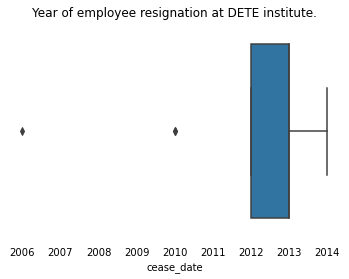

In [22]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)
import seaborn as sns
ax = sns.boxplot(x = dete_resignations['cease_date'])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_title('Year of employee resignation at DETE institute.')

Text(0.5, 1.0, 'Year of employees resignation at TAFE institute.')

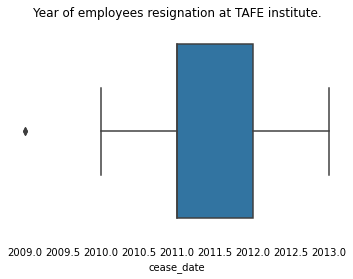

In [23]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)
import seaborn as sns
ax = sns.boxplot(x = tafe_resignations['cease_date'])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_title('Year of employees resignation at TAFE institute.')

As seen from the boxplot visualization of the years, there are no great concern and the values can be left as they are.

## How long did they work for?

Since the analysis is based on how dissatisfaction affected employees across different stages it is imperative that we discover how long the worked for. The TAFE institute has a column 'institute_service' which shows that but DETE institute does not so it would have to be calculated and assigned a new column 'institute_service' same as TAFE survey.

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

## Why did they resign?

Now that we have information on employees who resign and how long they worked for, attention will now be shifted to employees who resigned due to dissatisfactions.

There are two columns in the TAFE survey which will help with this:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissastisfaction

In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Job Dissatisfaction is clearly marked as a factor for resigning while others are marked as -. For better analysis boolean values would facilitate the analysis.


In [27]:
def update_vals(val):
    '''
    This function returns True if val is not '-', False if val is '-' and NaN if val is empty
    '''
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    

In [28]:
dissatisfaction = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[dissatisfaction] = tafe_resignations[dissatisfaction].applymap(update_vals)
tafe_resignations['dissatisfied'] = tafe_resignations[dissatisfaction].any(axis = 1, skipna=False)
tafe_resignations['dissatisfied']

3      False
4      False
5      False
6      False
7      False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

The columns for dissatisfaction in the DETE survey was considered as reason for dissatisfaction are:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

In [29]:
dissatisfaction = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 
                  'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
                  'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dissatisfaction].any(axis=1, skipna=False)
dete_resignations['dissatisfied']

3      False
5       True
8      False
9       True
11     False
       ...  
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

## Combining the surveys

Since the analysis is on both surveys it is necessary to combine them. Most of the columns to be working with already have the same name but we need a way to identify from which survey the data comes from and a column 'institute' will be created in both columns and then combined to that effect.

In [30]:
dete_resignations_up  = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [31]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], sort = True)

In [32]:
combined

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Career Move - Private Sector,-,-,False,-,-,False,-,-,-,...,5-6,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,-,Career Move - Public Sector,-,False,-,-,False,-,-,-,...,1-2,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,-,Career Move - Public Sector,-,False,-,-,False,-,-,-,...,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,-,-,-,False,-,-,False,-,-,Other,...,1-2,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are a lot of columns that are not necessary for the analysis, there will be dropped based on the number of NaN in the dataset, that is if there are more than 500 Null values then that column should be dropped.

In [33]:
combined_updated = combined.dropna(axis=1, thresh = 500).copy(deep=True)
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation-Move overseas/interstate
...,...,...,...,...,...,...,...,...,...,...
696,21 25,2013.0,False,Temporary Full-time,Male,6.350660e+17,TAFE,5-6,Operational (OO),Resignation
697,51-55,2013.0,False,Temporary Full-time,Male,6.350668e+17,TAFE,1-2,Teacher (including LVT),Resignation
698,NaN,2013.0,False,NaN,NaN,6.350677e+17,TAFE,NaN,NaN,Resignation
699,51-55,2013.0,False,Permanent Full-time,Female,6.350704e+17,TAFE,5-6,Teacher (including LVT),Resignation


> It is now possible to use the combined dataset to make the appropriate analysis by finding out how dissatisfaction plays a role in their resignation.

### Experience groups

It was discovered eairlier that the years in the institute service column of the tafe survey is inconsistent in their format (as some are alphanumeric) with the dete survey and this poses a problem that needs to be solved by making the years consistent as it is not suitable to perform analysis the way it is. 

In [34]:
combined_updated[combined_updated['institute'] == 'TAFE']['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [35]:
pattern = r'(\d+)'
combined_updated['institute_service'] = combined_updated['institute_service'].astype(dtype='str').str.extract(pattern)

In [36]:
combined_updated['institute_service']

3        7
5       18
8        3
9       15
11       3
      ... 
696      5
697      1
698    NaN
699      5
701      3
Name: institute_service, Length: 651, dtype: object

In [37]:
combined_updated.loc[:,'institute_service'] = combined_updated['institute_service'].astype(dtype='float')
combined_updated['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5.0
697     1.0
698     NaN
699     5.0
701     3.0
Name: institute_service, Length: 651, dtype: float64

The format in the column now allows for valid analysis of dissatisfaction based on experience groups. It should be noted that during the conversion experience groups of for instance 2-5 years is taken as 2 years. The analysis based on experience groups will be using the following criteria:
* New employees: Experience less than 3 years.
* Experienced: Experience 3-6 years.
* Established: Experience 7-10 years.
* Veteran: Experience above 10 years. 
These will be recorded against each row using the column 'service_cat'

In [38]:
def map_career(value):
    '''
    This function maps experience groups based on the number of years.
    
    parameters
    -----------
    val:int
    number of years of experience
    -----------
    returns
    New if val is less than 3
    Experienced if val is greater than or equal to 3 and less than or equal to 6
    Established if val is greater than or equal to 7 and less than or equal to 10
    Veteran if val is greater than 10
    '''
    
    if pd.isnull(value):
        return np.nan
    elif value<3:
        return 'New'
    elif (value>=3) & (value<=6):
        return 'Experienced'
    elif (value>=7) & (value<=10):
        return 'Established'
    else:
        return 'Veteran'

In [39]:
combined_updated.loc[:, 'service_cat'] = combined_updated['institute_service'].apply(map_career)
combined_updated['service_cat']

3      Established
5          Veteran
8      Experienced
9          Veteran
11     Experienced
          ...     
696    Experienced
697            New
698            NaN
699    Experienced
701    Experienced
Name: service_cat, Length: 651, dtype: object

In [40]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

### Age groups

Similar to the experience groups we need to split the age into groups to find out how dissatisfaction spreads across them, again the age column suffers the same inconsisitencies as the institute_service column before and needs to be put in a format that aids analysis.

In [41]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Using the same process that institute_service column underwent the age column can be made ready for analysis

In [42]:
pattern = r'(\d+)'


combined_updated['age'] = combined_updated['age'].astype(dtype='str').str.extract(pattern).astype('float')
combined_updated['age'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

Age can be broken down into groups as follow:
* Baby boomers: Older than 56
* Gen X: Between 40-55
* Gen Y: Between 24-39
* Gen Z: Younger than 24
The result will be put in a new column 'age_cat'

In [43]:
def map_age(val):
    '''
    name: map_age(val)
    input: age
    output: age group
    description: the function outputs the age group to which a given age must fall into
    '''
    
    if pd.isnull(val):
        return np.nan
    elif val<24:
        return 'Gen Z'
    elif (val>=24) & (val<=39):
        return 'Gen X'
    elif (val>=40) & (val<=55):
        return 'Gen Y'
    else: 
        return 'Baby boomer'

In [44]:
combined_updated.loc[:,'age_cat'] = combined_updated['age'].apply(map_age)
combined_updated['age_cat'].value_counts(dropna=False)

Gen Y          245
Gen X          201
Baby boomer     78
Gen Z           72
NaN             55
Name: age_cat, dtype: int64

### The answer


Since the age and experience groups have been classified it is now possible to find insights on how dissatisfaction plays a role in the employees resignation.

Futher analysis on the _dissatisfied_ column reaveals that there are some null values. The amount of null values will determine whether records with null values need to be dropped to help with data aggregation.

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Since there are just 8 null values changing them to False would not significantly impact the analysis because there are more False values than True

In [46]:
combined_updated['dissatisfied'].fillna(value=False, inplace=True)

In [47]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

**Question**: How much does dissatisfaction play a role by experience groups?

Text(0.5, 1.0, 'Resignations caused by dissatisfaction by Experience Groups')

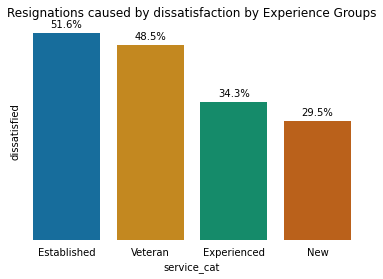

In [48]:
import seaborn as sns
ax = sns.barplot(x=combined_updated['service_cat'], y=combined_updated['dissatisfied'], estimator=np.mean, ci=0, palette='colorblind')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='center', xytext=(0,9), textcoords='offset points')

ax.tick_params(left=False, bottom=False)
ax.set_title('Resignations caused by dissatisfaction by Experience Groups')


**Question**:How does dissatisfaction play a role by age group?

Text(0.5, 1.0, 'Percentage of Employees that Resigned by Age Group.')

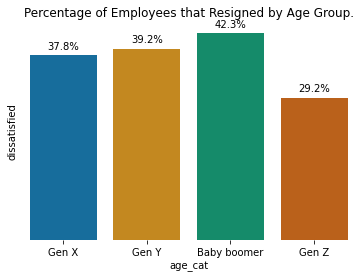

In [49]:
import seaborn as sns
ax = sns.barplot(x = combined_updated['age_cat'], y=combined_updated['dissatisfied'], estimator=np.mean, ci=0, palette='colorblind')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left = False, right=False)
ax.set_yticks([])

total = len(combined_updated['dissatisfied'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='center', xytext=(0,9), textcoords='offset points')
    
ax.set_title('Percentage of Employees that Resigned by Age Group.')

**Question**: Did more employee in the DETE survey or TAFE survey resigned because they were dissatisfied?

**By experience group**

Text(0.5, 1.0, 'Percentage of Employees that Resigned by Experience Groups.')

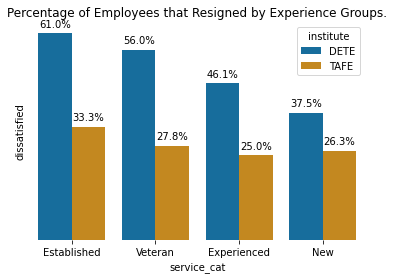

In [50]:
import seaborn as sns
ax = sns.barplot(x=combined_updated['service_cat'], y=combined_updated['dissatisfied'], hue=combined_updated['institute'],
                estimator=np.mean, ci=0, palette='colorblind')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, right=False)
ax.set_yticks([])

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='center', xytext=(0,9), textcoords='offset points')
    
ax.set_title('Percentage of Employees that Resigned by Experience Groups.')

**By age category**

Text(0.5, 1.0, 'Percentage of Employees that Resigned by Age Group')

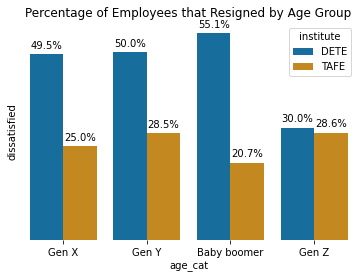

In [51]:
import seaborn as sns
ax = sns.barplot(x = combined_updated['age_cat'], y = combined_updated['dissatisfied'],
                hue = combined_updated['institute'], estimator=np.mean, ci=0, palette='colorblind')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, right=False)
ax.set_yticks([])

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='center', xytext=(0,9), textcoords='offset points')
    
ax.set_title('Percentage of Employees that Resigned by Age Group')

# Conclusion

In this project I analysed the responses from the DETE and TAFE surveys to draw insights on how dissatisfaction played a role in employee resignations.

The analysis required the cleaning and reshaping of the datasets to draw insights across defined experienced and age groups.
Employees that are older or have more experience tend to more dissatisfied than their younger couterparts.